#### Extracting maximum business value through intensive data analysis

# Analysis of Online Auction Data. Kernel by Javier Marti
Dataset of approx +10.000 online auction transactions.
What is the data trying to tell us? What can we find out about the patterns and relationships contained within it?
Our analysis will let us dive into the numbers to get important information on this market, at the period shown. I will also point to potential areas that require further investigation, based on the numbers presented here. 
We shall proceed to clean the data first, and then to extract conclusions from it.

# What does the data look like?

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('auction.csv')
df.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


# Visual representations and initial gathering of information about the dataset

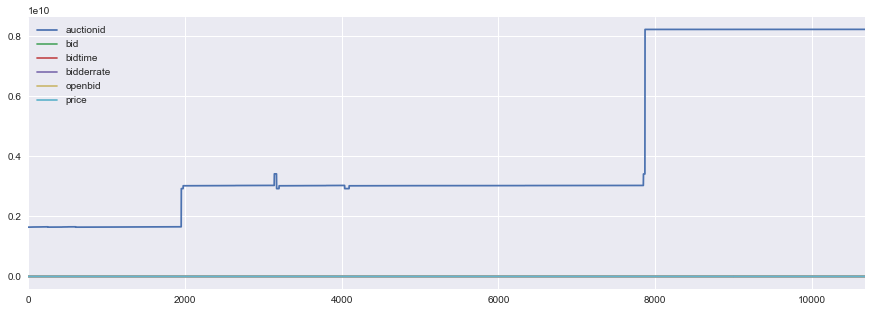

In [140]:
#Let's plot the dataframe for a first visual look
df.plot(figsize = (15,5))

In [141]:
#Grabbing file basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
auctionid       10681 non-null int64
bid             10681 non-null float64
bidtime         10681 non-null float64
bidder          10665 non-null object
bidderrate      10670 non-null float64
openbid         10681 non-null float64
price           10681 non-null float64
item            10681 non-null object
auction_type    10681 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [142]:
#What are the main stats for this dataset?
df.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,1.068100e+04,10681.000000,10681.000000,10670.000000,10681.000000,10681.000000
mean,4.136148e+09,207.586109,3.979628,31.936739,52.246256,335.043589
std,2.489918e+09,323.037396,2.353386,120.594074,168.453245,433.566009
min,1.638844e+09,0.010000,0.000567,-4.000000,0.010000,26.000000
25%,3.015329e+09,72.000000,1.949931,1.000000,1.000000,186.510000
50%,3.020526e+09,140.000000,4.140833,5.000000,4.990000,228.490000
75%,8.212136e+09,210.000000,6.448060,21.000000,50.000000,255.000000
max,8.215611e+09,5400.000000,6.999990,3140.000000,5000.000000,5400.000000


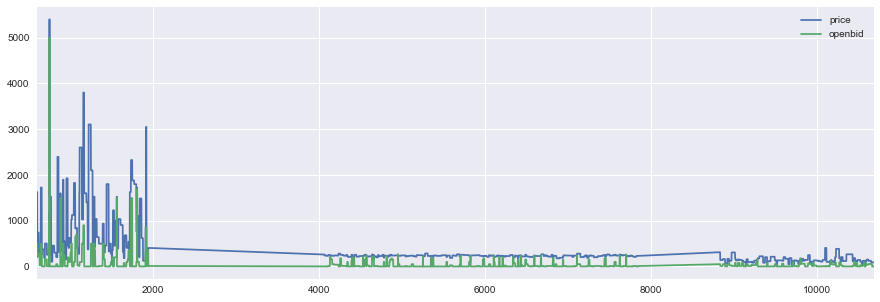

In [143]:
test = df.groupby('auction_type')
test.get_group('7 day auction')[['price','openbid']].plot(figsize = (15,5))

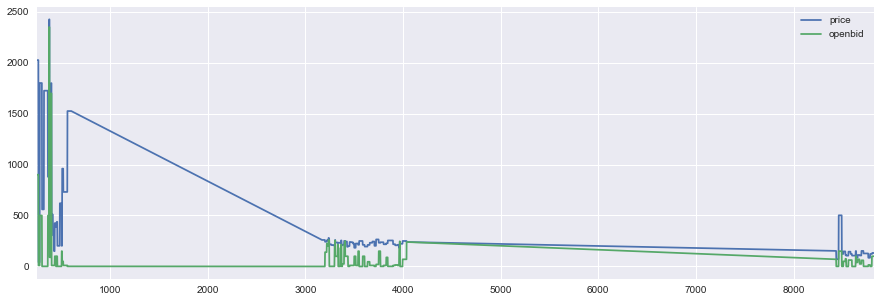

In [144]:
test = df.groupby('auction_type')
test.get_group('5 day auction')[['price','openbid']].plot(figsize = (15,5))

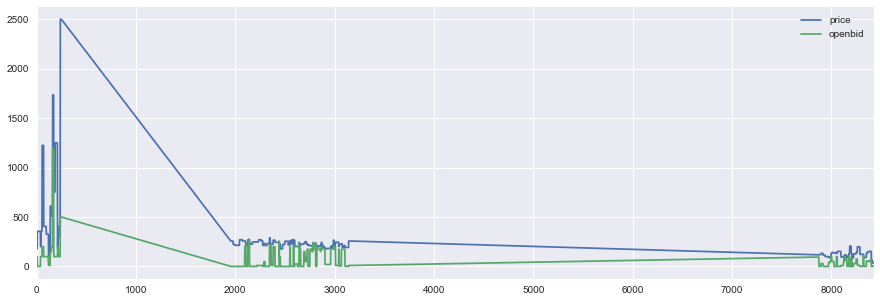

In [145]:
test = df.groupby('auction_type')
test.get_group('3 day auction')[['price','openbid']].plot(figsize = (15,5))

# Several things catch our attention on this dataset, requiring further investigation:
- significant standard deviations in the price, bidderrate and bid categories
- a negative value in at least one biderrate category item
- a very low minimum bid in at least one item...way before the minimum price ever asked
- what appears to be an extremely high biderrate maximum item
- bidtime is a float, not a datetime value
- Some parts of the data provided require further verification (example: huge disparity between bids and prices between the approx. 2000 and 4000 values for 7 days auctions)

# Since we only have the information provided, we continue our investigation with what we have...

In [146]:
#What type of items does this dataset contain?
df.item.unique()

array(['Cartier wristwatch', 'Palm Pilot M515 PDA', 'Xbox game console'], dtype=object)

In [147]:
#Next we look for outliers visually...

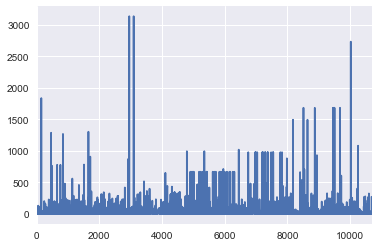

In [148]:
#Bider rate
df.bidderrate.plot()

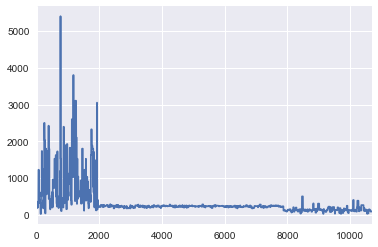

In [149]:
#Price graph
df.price.plot()

# Initiating wrangling and verification process...

In [150]:
#Any NaN values? Some NaN values in bidder and bidderrate...
df.isnull().sum()

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

In [151]:
#drop any rows that contain missing cells
df = df.dropna(how = 'any')
df.shape

(10654, 9)

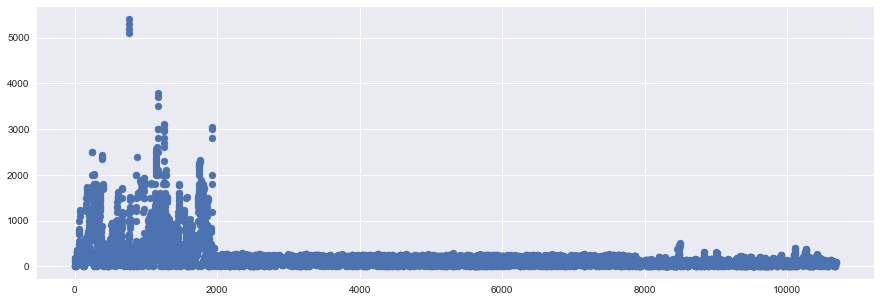

In [152]:
#Basic scatterplot Bidtime/bid ratio
plt.figure(figsize = (15,5))
plt.scatter(x = df['bidtime'].index, y = df['bid'])
plt.title = ('Bidtime/Bid ratio')
plt.xlabel = ('Bidtime')
plt.ylabel = ('Bid')
plt.show()


In [153]:
# Any duplicates? No duplicated rows...
df.duplicated().sum()

0

In [154]:
#convert bidtime column to datetime format, in order to be able to perform operations on it later
df ['bidtime'] = pd.to_datetime(df['bidtime'], unit = 's')
df.head()

D:\Program files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,1970-01-01 00:00:02.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,1970-01-01 00:00:02.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,1970-01-01 00:00:02.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,1970-01-01 00:00:02.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,1970-01-01 00:00:02.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


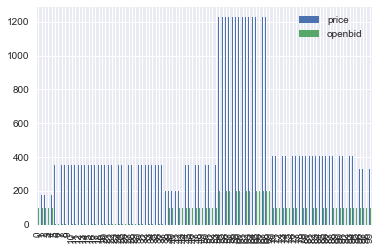

In [155]:
#Verification: as can be expected, open bids are usually lower than the asking price
df[['price', 'openbid']][:100].plot(kind = 'bar')

In [156]:
#Most expensive item ever bought?
df.price.max()

5400.0

In [157]:
#Least expensive item ever bought? $26
df.price.describe()

count    10654.000000
mean       335.637373
std        433.939406
min         26.000000
25%        187.520000
50%        229.040000
75%        255.000000
max       5400.000000
Name: price, dtype: float64

In [158]:
#Best seller item? Palm Pilot
df.item.value_counts()

Palm Pilot M515 PDA    5917
Xbox game console      2784
Cartier wristwatch     1953
Name: item, dtype: int64

# What's the variability in prices for the items sold? The Cartier wristwatch is the one with the highest variability in price

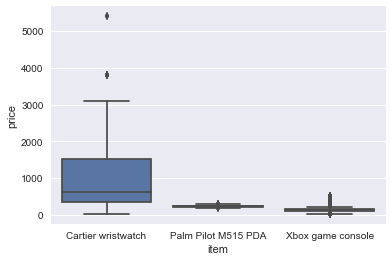

In [159]:
#What's the variability in prices for the items sold? The Cartier wristwatch is the one with the highest variability in price
sns.boxplot(x = df.item, y=df.price)

In [160]:
#What's the detailed price data for each one of the items on auction?
df.groupby('item').price.agg(['count','mean','max','min'])

,count,mean,max,min
item,,,,
Cartier wristwatch,1953,925.047906,5400.00,26.0
Palm Pilot M515 PDA,5917,231.130267,290.00,175.0
Xbox game console,2784,144.275941,501.77,31.0


In [161]:
#What's the standard deviation for each item sold?
df.groupby('item').price.std()

item
Cartier wristwatch     765.400140
Palm Pilot M515 PDA     20.878912
Xbox game console       72.947829
Name: price, dtype: float64

# Is there any correlation among any of the elements on the dataset?

In [162]:
#Is there any correlation among any of the elements on the dataset? No
df.corr()

,auctionid,bid,bidderrate,openbid,price
auctionid,1.000000,-0.320638,-0.006103,-0.147379,-0.378799
bid,-0.320638,1.000000,-0.016785,0.609901,0.858244
bidderrate,-0.006103,-0.016785,1.000000,-0.002077,-0.016005
openbid,-0.147379,0.609901,-0.002077,1.000000,0.495222
price,-0.378799,0.858244,-0.016005,0.495222,1.000000


In [163]:
#What's the maximum ever bid, or paid, for an item?
df.loc[:,'openbid':'price'].apply(max, axis = 0)


openbid    5000.0
price      5400.0
dtype: float64

In [164]:
#what's the total value of ALL the items sold? $3.5M
df.price.sum()

3575880.5699998992

In [165]:
#Quantity ordered of the most expensive item?
df.sort_values(by = 'price', ascending = False).head(5)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
757,1639672910,5200.0,1970-01-01 00:00:06.291875,esmodeus,0.0,5000.0,5400.0,Cartier wristwatch,7 day auction
758,1639672910,5100.0,1970-01-01 00:00:06.925521,akapson,7.0,5000.0,5400.0,Cartier wristwatch,7 day auction
759,1639672910,5300.0,1970-01-01 00:00:06.926470,akapson,7.0,5000.0,5400.0,Cartier wristwatch,7 day auction
760,1639672910,5400.0,1970-01-01 00:00:06.933403,esmodeus,0.0,5000.0,5400.0,Cartier wristwatch,7 day auction
1165,1644046945,900.0,1970-01-01 00:00:00.154294,ewe1950,135.0,900.0,3800.0,Cartier wristwatch,7 day auction


# Who are the bidders that have ever bid or bought items over $4000?

In [166]:
#Who are the bidders that have ever bid or bought items over $4000?
df['bidder'][df['price']>4000]

757    esmodeus
758     akapson
759     akapson
760    esmodeus
Name: bidder, dtype: object

In [167]:
#What's the auction ID of the item that has sold for the most money?
df['price'].max()

5400.0

In [168]:
df.sort_values(by = 'price', ascending = False).head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
757,1639672910,5200.0,1970-01-01 00:00:06.291875,esmodeus,0.0,5000.0,5400.0,Cartier wristwatch,7 day auction
758,1639672910,5100.0,1970-01-01 00:00:06.925521,akapson,7.0,5000.0,5400.0,Cartier wristwatch,7 day auction
759,1639672910,5300.0,1970-01-01 00:00:06.926470,akapson,7.0,5000.0,5400.0,Cartier wristwatch,7 day auction
760,1639672910,5400.0,1970-01-01 00:00:06.933403,esmodeus,0.0,5000.0,5400.0,Cartier wristwatch,7 day auction
1165,1644046945,900.0,1970-01-01 00:00:00.154294,ewe1950,135.0,900.0,3800.0,Cartier wristwatch,7 day auction
1175,1644046945,3800.0,1970-01-01 00:00:06.999387,sirocco@prodigy.net,146.0,900.0,3800.0,Cartier wristwatch,7 day auction
1174,1644046945,3700.0,1970-01-01 00:00:06.998657,sirocco@prodigy.net,146.0,900.0,3800.0,Cartier wristwatch,7 day auction
1172,1644046945,3000.0,1970-01-01 00:00:05.627720,nguyenat@san.rr.com,3.0,900.0,3800.0,Cartier wristwatch,7 day auction
1171,1644046945,2800.0,1970-01-01 00:00:05.627604,nguyenat@san.rr.com,3.0,900.0,3800.0,Cartier wristwatch,7 day auction
1170,1644046945,2500.0,1970-01-01 00:00:05.627442,nguyenat@san.rr.com,3.0,900.0,3800.0,Cartier wristwatch,7 day auction


In [169]:
#What has been the max standard deviation between price and bid for an item?
df.groupby('price').bid.std().max()

1029.7135292826986

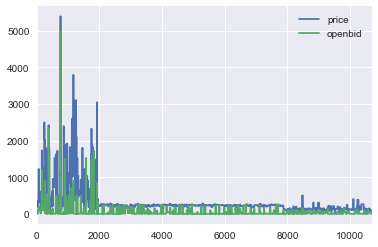

In [170]:
#Representing Price/Openbid ration in visual form
df[['price','openbid']].plot()

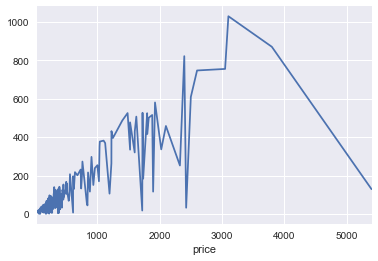

In [171]:
#What has been the max historic standard deviation between price and bid for an item, in graphic form?
df.groupby('price').bid.std().plot()

In [172]:
#let's investigate the bidding history of one of the most expensive items ever sold, with autctionid 1639672910
test = df.groupby('auctionid')
test.get_group(1639672910)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
757,1639672910,5200.0,1970-01-01 00:00:06.291875,esmodeus,0.0,5000.0,5400.0,Cartier wristwatch,7 day auction
758,1639672910,5100.0,1970-01-01 00:00:06.925521,akapson,7.0,5000.0,5400.0,Cartier wristwatch,7 day auction
759,1639672910,5300.0,1970-01-01 00:00:06.926470,akapson,7.0,5000.0,5400.0,Cartier wristwatch,7 day auction
760,1639672910,5400.0,1970-01-01 00:00:06.933403,esmodeus,0.0,5000.0,5400.0,Cartier wristwatch,7 day auction


# What are the 50 historically most popular items...with the highest number of bids?

In [173]:
#What are the 50 historically most popular items...with the highest number of bids?
#df.sort_values(by = 'auctionid', ascending = False)
#df.groupby('auctionid').count().head()
df['auctionid'].value_counts().head(50)

8214355679    75
8212629520    57
3023174478    54
3020532816    51
8212602164    50
1644594033    46
3024823511    45
8212359174    45
3018788243    45
8212236671    43
3016342535    43
1649028956    42
3018594562    42
3023748273    42
3024124623    41
8214330322    41
1650406935    41
3025665574    41
1640809333    40
3024165142    40
8212140993    40
3025307420    40
3022352711    39
3024676416    38
3019540740    38
8213188385    38
8212903781    38
8214275008    38
3026374373    37
3019070859    37
3015682701    37
3025473203    37
3018738379    36
8213387444    36
8212668731    36
3020431774    36
8213013625    36
3014012355    35
8214435010    35
8212591610    35
3024980031    35
3020562562    35
3023120360    35
8214772603    35
8213119950    34
3023746524    34
3024487267    33
3015328849    33
3019508285    33
3019326870    33
Name: auctionid, dtype: int64

In [174]:
#(Verification of the previous step with an item taken at random) 
#Effectively, there are 33 occurrences of bid actions for this item 
df[df.auctionid == 3019326870]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
5546,3019326870,5.01,1970-01-01 00:00:00.072740,aardvark-tek,61.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5547,3019326870,5.00,1970-01-01 00:00:00.151200,nwcompuser,18.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5548,3019326870,10.00,1970-01-01 00:00:00.151350,nwcompuser,18.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5549,3019326870,6.87,1970-01-01 00:00:00.584470,jlustick@hotmail.com,100.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5550,3019326870,20.00,1970-01-01 00:00:00.833250,whimsykindt,20.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5551,3019326870,20.00,1970-01-01 00:00:00.873890,acinomous,0.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5552,3019326870,22.00,1970-01-01 00:00:00.874000,acinomous,0.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5553,3019326870,28.00,1970-01-01 00:00:01.233780,romeroom,13.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5554,3019326870,65.50,1970-01-01 00:00:01.488520,whimsykindt,20.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction
5555,3019326870,35.00,1970-01-01 00:00:01.731420,acinomous,0.0,0.01,237.5,Palm Pilot M515 PDA,7 day auction


# Who are the top 5 bidders?

In [175]:
#Who are the top 5 bidders?
df.bidder.value_counts().head(5)

warrencheryl    45
zebedin         33
mregestr        33
babygirljrt     32
macdonn         31
Name: bidder, dtype: int64

In [176]:
#Now let's see the 31 items bidder "macdonn" has bid on, in detail
df[df.bidder == 'macdonn']

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
1977,3014797177,20.0,1970-01-01 00:00:00.081980,macdonn,11.0,1.00,222.50,Palm Pilot M515 PDA,3 day auction
1978,3014797177,30.0,1970-01-01 00:00:00.083440,macdonn,11.0,1.00,222.50,Palm Pilot M515 PDA,3 day auction
1981,3014797177,35.0,1970-01-01 00:00:00.669290,macdonn,11.0,1.00,222.50,Palm Pilot M515 PDA,3 day auction
1982,3014797177,40.0,1970-01-01 00:00:01.013980,macdonn,11.0,1.00,222.50,Palm Pilot M515 PDA,3 day auction
1983,3014797177,45.0,1970-01-01 00:00:01.014220,macdonn,11.0,1.00,222.50,Palm Pilot M515 PDA,3 day auction
1984,3014797177,50.0,1970-01-01 00:00:01.016080,macdonn,11.0,1.00,222.50,Palm Pilot M515 PDA,3 day auction
2000,3014834745,30.0,1970-01-01 00:00:00.888160,macdonn,11.0,1.00,213.50,Palm Pilot M515 PDA,3 day auction
3247,3014834982,5.0,1970-01-01 00:00:00.896180,macdonn,11.0,1.00,217.50,Palm Pilot M515 PDA,5 day auction
3248,3014834982,10.0,1970-01-01 00:00:00.896330,macdonn,11.0,1.00,217.50,Palm Pilot M515 PDA,5 day auction
3249,3014834982,15.0,1970-01-01 00:00:00.896520,macdonn,11.0,1.00,217.50,Palm Pilot M515 PDA,5 day auction


In [177]:
#Is macdonn a daring or a shy bidder? Let's see all his bids over 200
df[(df.bidder == 'macdonn')&(df.bid>150)]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
4751,3016770041,175.0,1970-01-01 00:00:04.839140,macdonn,11.0,0.01,227.5,Palm Pilot M515 PDA,7 day auction
4754,3016770041,180.0,1970-01-01 00:00:05.852850,macdonn,11.0,0.01,227.5,Palm Pilot M515 PDA,7 day auction


In [178]:
#We could analyze participation in more detail by separating by type of auction too...
pd.crosstab(df.auction_type, df.bidder).T

auction_type,3 day auction,5 day auction,7 day auction
bidder,,,
**balancedbody4u**,0,9,0
*champaignbubbles*,3,0,0
-kim-,0,1,0
100buyer,1,0,0
11860256,0,0,14
12345678bird,0,0,3
123golfdawg,1,0,0
12girl,0,0,1
14cisco,0,0,1


In [179]:
#It's important to note that we have negative values in "biderrate" 
#Either the data is faulty or these values are normal. However, the explanation of why a negative rating would exist is not provided to us.
df.bidderrate.sort_values(ascending = True).head(30)

1812   -4.0
1804   -4.0
578    -4.0
1108   -2.0
4652   -2.0
1095   -2.0
4858   -2.0
4701   -2.0
8702   -1.0
9666   -1.0
5276   -1.0
5741   -1.0
3817   -1.0
3238   -1.0
3816   -1.0
3240   -1.0
3241   -1.0
5275   -1.0
834    -1.0
7770   -1.0
1222   -1.0
5328   -1.0
1223   -1.0
5327   -1.0
1224   -1.0
3787   -1.0
7852   -1.0
1827    0.0
5464    0.0
1822    0.0
Name: bidderrate, dtype: float64

In [180]:
#What's the bidding hisotry of one particular random item...in this case, 3019146651? 
df[df.auctionid == 3019146651]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
5381,3019146651,123.0,1970-01-01 00:00:00.105710,norimmu@aol.com,242.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5382,3019146651,10.0,1970-01-01 00:00:00.140650,vegos,156.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5383,3019146651,11.0,1970-01-01 00:00:00.485720,msecovich,19.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5384,3019146651,50.0,1970-01-01 00:00:00.720840,jtvr,113.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5385,3019146651,76.0,1970-01-01 00:00:00.721020,jtvr,113.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5386,3019146651,100.0,1970-01-01 00:00:00.721180,jtvr,113.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5387,3019146651,105.0,1970-01-01 00:00:00.793360,bestatless,1.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5388,3019146651,110.0,1970-01-01 00:00:00.793510,bestatless,1.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5389,3019146651,121.0,1970-01-01 00:00:02.056190,saltcreekenterprises,9.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction
5390,3019146651,150.0,1970-01-01 00:00:04.211040,kurt9golf,19.0,1.0,240.0,Palm Pilot M515 PDA,7 day auction


In [181]:
#Going deeper into auction type, we find out main values for 3, 5 and 7 day auctions
test = df.groupby('auction_type')
print(test.get_group('3 day auction').describe())
print(test.get_group('5 day auction').describe())
print(test.get_group('7 day auction').describe())

          auctionid          bid   bidderrate      openbid        price
count  2.019000e+03  2019.000000  2019.000000  2019.000000  2019.000000
mean   4.277066e+09   166.285225    28.043091    61.621367   254.666756
std    2.459348e+09   199.423549   157.432804   115.652334   271.211295
min    1.638894e+09     0.020000     0.000000     0.010000    26.000000
25%    3.016343e+09    70.000000     1.000000     1.000000   152.000000
50%    3.023250e+09   145.000000     5.000000     9.990000   213.500000
75%    8.213074e+09   203.500000    17.500000    99.990000   248.500000
max    8.215611e+09  2500.000000  3140.000000  1200.000000  2500.000000
          auctionid          bid   bidderrate      openbid        price
count  1.617000e+03  1617.000000  1617.000000  1617.000000  1617.000000
mean   3.977999e+09   230.266865    28.680272    70.503908   370.878027
std    2.461252e+09   320.953080   100.815774   192.221640   438.418457
min    1.639826e+09     0.060000    -4.000000     0.010000    41

In [182]:
#How popular are different types of auctions?
df.auction_type.value_counts()

7 day auction    7018
3 day auction    2019
5 day auction    1617
Name: auction_type, dtype: int64

# What is the general evolution of auction prices for the period?

In [183]:
from sklearn.linear_model import LinearRegression as LinReg
x = df.index.values.reshape(-1, 1)
y = df.price.values



In [184]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print(reg.score(x,y))

0.224706804227


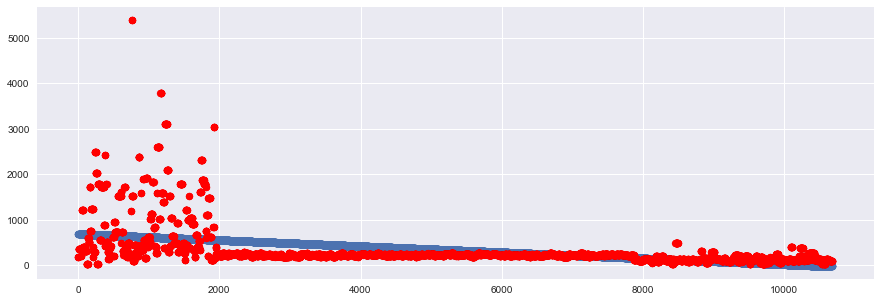

In [185]:
plt.figure(figsize = (15,5))
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x, y=y, c='r')

# What are the best products to sell? Finding above-average products...

In [276]:
#What's the auctionid of every item that has been sold above average price and openbid? 
#the mean for price is 335 and the mean for openbid is 52
test = df.loc[(df['price'] > 335) & (df['openbid'] > 52), 'auctionid']
super_items = test.unique()
super_items
# var_name = pd.Series(test)
# var_name.plot()

array([1642243766, 1643075711, 1643544538, 1645883276, 1645914432,
       1646353713, 1647149304, 1647870862, 1648782304, 1649726994,
       1639826019, 1640495398, 1641112143, 1641154540, 1641962219,
       1642322610, 1644327264, 1646079608, 1638843936, 1638844284,
       1638844464, 1639226378, 1639333116, 1639364679, 1639672910,
       1641062012, 1641242797, 1641457876, 1641628327, 1641629836,
       1641880134, 1641880908, 1642005995, 1642185637, 1642514892,
       1642561397, 1642875447, 1642876200, 1642911743, 1643212361,
       1643244227, 1644046945, 1644138548, 1644252877, 1644309984,
       1644681469, 1646145109, 1647320738, 1647329406, 1647567213,
       1648363974, 1648613621, 1648661746, 1649173313, 1649567847,
       1649757877, 1649808226, 1649845539, 1649848613, 1650515990,
       1650530689, 1650981438, 8212830525], dtype=int64)

In [224]:
df.bidder.value_counts().mean()

3.147415066469719

# Some conclusions from my data analysis...
- 7 days auctions are the most popular, followed by 3 day auctions and 5 days auctions. If we are selling, it is better to list our product for 7 days
- There is no significant correlation among all the values in the dataset, including auction popularity and price
- The Cartier wristwatch is the product with the highest variability in price. Knowing this helps bidders get better resale opportunities if they manage to get one of the wristwatches at a good price and sell it for a higher price later
- Some parts of the data provided require further verification (example: huge disparity between bids and prices between the approx. 2000 and 4000 values for 7 days auctions)
- There is a higher standard deviation for products on the lower half of the price bracket. This means that there is more competition for these products. This fact may increase the final price of the item we are selling.
- We have identified the sellers that tend to buy items above a certain price. If we are selling and have a way to directly approach them to sell directly to them for a fixed price, this may be a good idea, since it is clear that products in the higher price bracket do not show significatn increases in price due to competition in open auctions.
- Based on what we have learned, if we are selling, the best strategy would be to sell an item in the 30% to 50% price range, in a 7 day auction. If we could only choose one product to sell, we should choose to trade in Cartier wristwatches, for on this product we have higher chances of buying low and selling high later.